### CCO50- Digital Speech Processing  
# Short Test 2

**Description:** Define two discrete-time signals, i.e., a[·] and b[·], being the former two-sample long and the latter four-sample long. 
Then, obtain the resulting signal y[·]=a[·] * b[·].

$$
a = \begin{pmatrix} 10 & 0   \end{pmatrix}
\\
b = \begin{pmatrix} -6 & -1 & 0.41 & 2  \end{pmatrix}
\\ \\
y = a * b
\\ 
a * b = \displaystyle\sum_{k} a_k \cdot b_{n-k}
$$

We can use a practical procedure to solve this by hand:

|       	|      	|     	| 10  	| 0   	| $a$        	|
|-------	|------	|-----	|------	|-----	|------------	|
|       	| -6  	| -1  	| 0.41  | 2  	| $b$        	|
|       	|      	|     	| 20 	| 0   	|            	|
|       	|      	| 4.1 	| 0    	| +   	|            	|
|       	| -10 	| 0   	| +    	|     	|            	|
| -60      	| 0    	| +   	|      	|     	|            	|
| (-60 	    | -10 	| 4.1 	| 20    | 0 ) 	| $ = a * b$ 	|


$$
y = \begin{pmatrix} -60 & -10 & 4.1 & 20 & 0  \end{pmatrix}
$$

**Description:**  Convolve y[·], just obtained, with itself.

|         	|        	|       	|          	| -60        	| -10 	| 4.1    	| 20 	| 0  	| $y$        	|
|---------	|--------	|-------	|----------	|-----------	|------	|--------	|-----	|----	|------------	|
|         	|        	|       	|          	| -60         	| -10 	| 4.1    	| 20 	| 0  	| $y$        	|
|         	|        	|       	|          	| 0         	| 0    	| 0      	| 0   	| 0  	|            	|
|         	|        	|       	| -1200  	| -200      	| 82 	| 400    	| 0   	| +  	|            	|
|         	|        	| -246   	| -41     	| 16,81     	| 82 	| 0      	| +   	|    	|            	|
|         	| 600     	| 100   	| -41     	| -200    	    | 0    	| +      	|     	|    	|            	|
| 3600  	| 600     	| -246   	| -1200  	| 0         	| +    	|        	|     	|    	|            	|
| (3600 	| 1200   	| -392   	| -2482 	| -383.19    	| 164 	| 400    	| 0 	| 0) 	| $ = y * y$ 	|


$$
y * y = \begin{pmatrix} 3600 & 1200 & -392 & -2482 & -383.19 & 164 & 400 & 0 & 0  \end{pmatrix}
$$

**Description:** find a general equation to calculate the length of any resulting convolved signal from the lengths of both the input signals.

$$
length(a) = 2 
\\
length(b) = 4
\\ \\ \\
length(y) = 5 = length(a) + length(b) -1
\\ \\ \\
length(y*y) = 9 = length(y) + length(y) -1
\\ \\ \\ \\ \\
y = h[\cdot] * x[\cdot] \\ \\
length(y) = length(h) + length(x) - 1
$$

**Plus:** implementing the convolution in python


In [2]:
def discrete_time_convolution(k, x):
    """
    Perform convolution of an audio signal with a kernel.

    Parameters:
    k (list): The kernel for convolution.
    x (list): The input audio signal.

    Returns:
    list: The convolved audio signal.
    """
    n = len(k)
    m = len(x)
    y = [0] * (m + n - 1)

    for i in range(m):
        for j in range(n):
            y[i + j] += x[i] * k[j]

    return y

In [8]:
a = [10, 0]
b = [-6, -1, 0.41, 2]

y = discrete_time_convolution(a, b)

print(y)

[-60, -10, 4.1, 20.0, 0]


In [9]:
y_2 = discrete_time_convolution(y, y)
print(y_2)

[3600, 1200, -391.99999999999994, -2482.0, -383.19, 164.0, 400.0, 0.0, 0]


## Extra
### Generating waves and covolving them


In [14]:
import numpy as np
import pyaudio
import matplotlib.pyplot as plt


In [40]:
# defining a function to play the signal
def play_signal(signal, sample_rate=44100):
    p = pyaudio.PyAudio()

    stream = p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=sample_rate,
                    output=True)

    stream.write(signal.tobytes())

    stream.stop_stream()
    stream.close()

    p.terminate()

In [ ]:
# defining a function to see the signal
def plot_waveform(wave, label, title):
    plt.figure(figsize=(10, 4))
    plt.plot(wave, label=label)
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()

In [12]:
# generating a sine wave with a frequency of 440Hz (note A) and a sine wave with frequency of 256.63 Hz (note C) and sample rate of 44100Hz
sample_rate = 44100
s_A = (np.sin(2 * np.pi * np.arange(sample_rate) * 440 / sample_rate)).astype(np.float32)
s_C = (np.sin(2 * np.pi * np.arange(sample_rate) * 256.63 / sample_rate)).astype(np.float32)

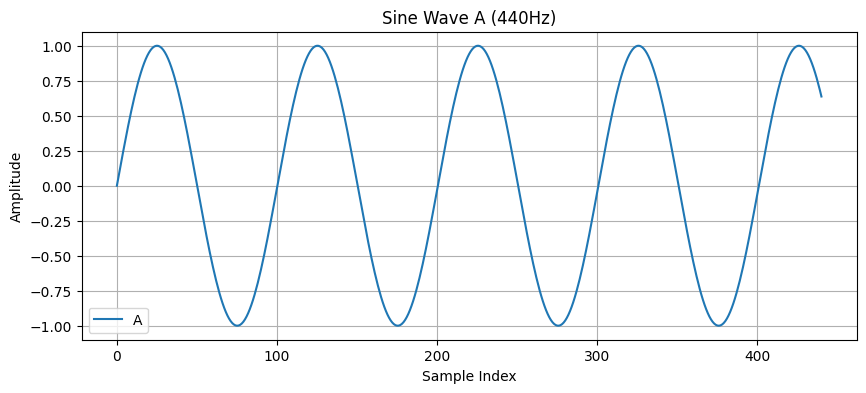

In [ ]:
plot_waveform(s_A[:441], "A", "Start of Wave A (440Hz)")

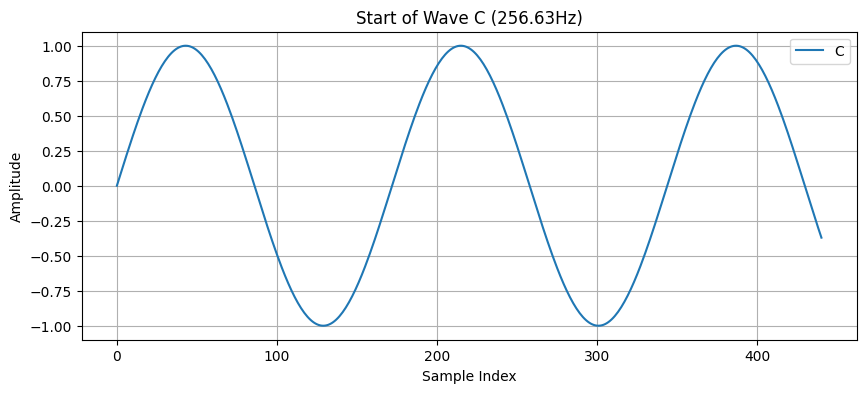

In [21]:
plot_waveform(s_C[:441], "C", "Start of Wave C (256.63Hz)")

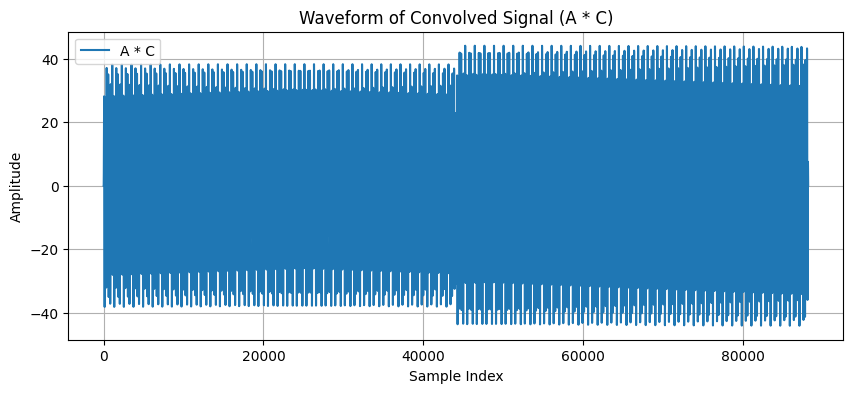

In [ ]:
A_conv_C = np.convolve(s_A, s_C) #for perfomances reasons
plot_waveform(A_conv_C, label="A * C", title="Waveform of Convolved Signal (A * C)")

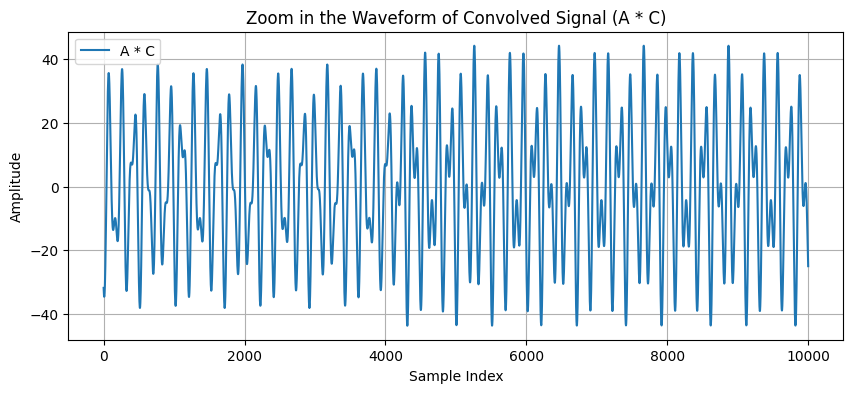

In [23]:
plot_waveform(A_conv_C[40000:50000], label="A * C", title="Zoom in the Waveform of Convolved Signal (A * C)")

In [99]:
play_signal(s_A * 0.2) #play the original signal A with lower amplitude
play_signal(s_C * 0.2) #play the original signal C with lower amplitude
play_signal(A_conv_C * 0.02) #play the convolved signal, with very lower amplitude otherwise the signal clips

### Analyzing the spectogram

In [30]:
# defining a function to see the spectrogram
def plot_spectrogram(signal, title):
    plt.figure(figsize=(10, 4))
    plt.specgram(signal, Fs=sample_rate, NFFT=1024, noverlap=512, cmap='viridis')
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label='Intensity (dB)')
    plt.show()

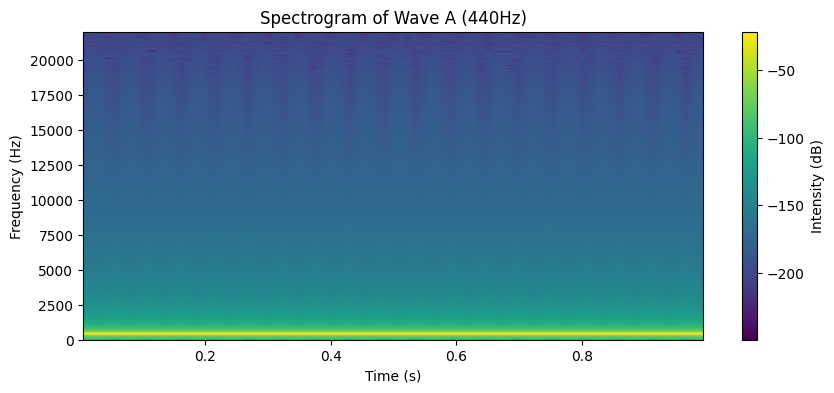

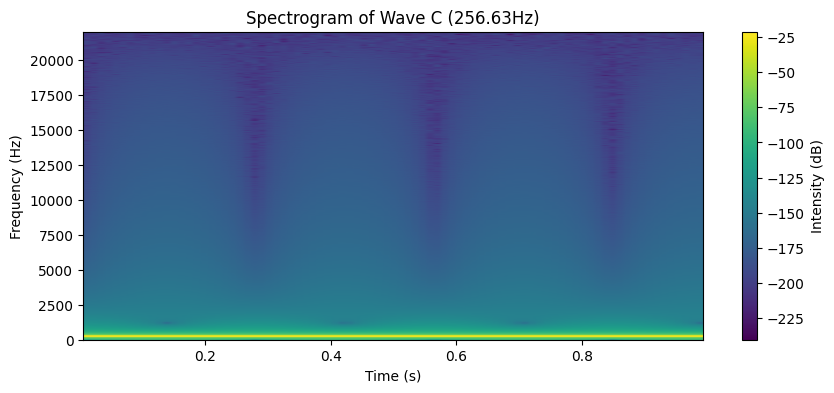

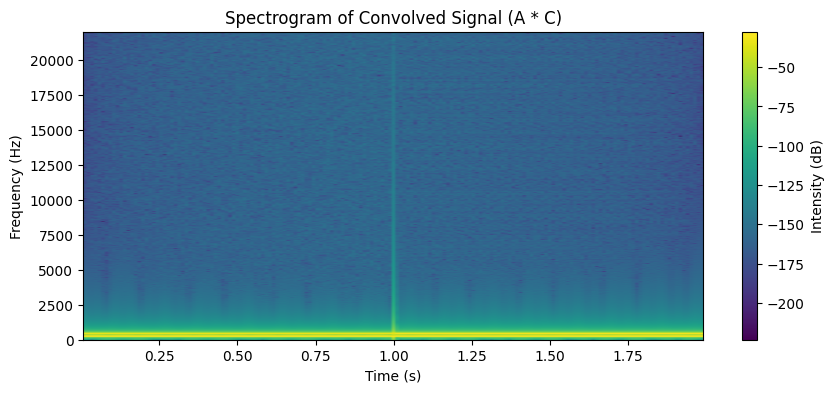

In [32]:
plot_spectrogram(s_A, "Spectrogram of Wave A (440Hz)")
plot_spectrogram(s_C, "Spectrogram of Wave C (256.63Hz)")
plot_spectrogram(A_conv_C * 0.02, "Spectrogram of Convolved Signal (A * C)")

As seen in the Spectogram of the convolved waves, both frequencies [440 and 256.3] have high intensity, right in the middle, where the first lenghth is met there is a peak of intensity for all frequencies. Also, compared to the original waves, the convolved seems to have more presence of all frequencies.

### Using it as a Reverb
The concept of convolution as described in the class had me thinking about reverb.
So we need a reverberation sample, it will be the x[·] vector that the h[·] will reverberate in, and h[·] can be any sound.

In [ ]:
from scipy.io import wavfile

In [60]:
def load_wav_file(file_path):
    sample_rate, data = wavfile.read(file_path)
    if data.ndim > 1:
        # If stereo, convert to mono by averaging channels
        data = np.mean(data, axis=1)
    # Normalize to float32 range
    data = data.astype(np.float32) / np.max(np.abs(data))
    # Ensure data is in the range [-1, 1]
    data = np.clip(data, -1.0, 1.0)
    return sample_rate, data

C:\Users\mathe\AppData\Local\Temp\ipykernel_7400\3892187661.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(file_path)


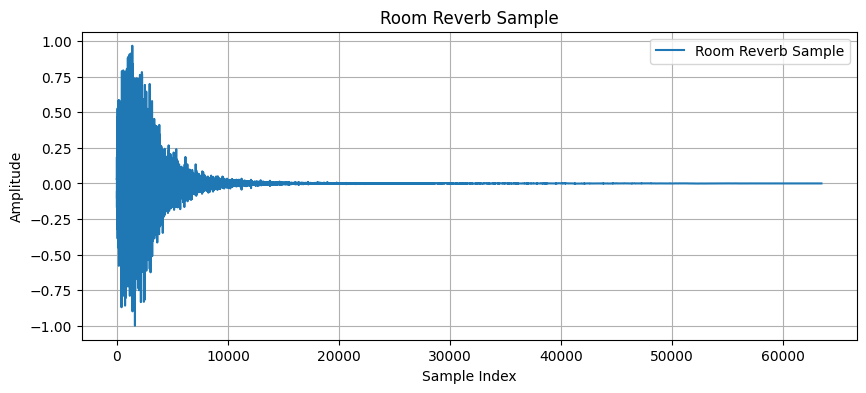

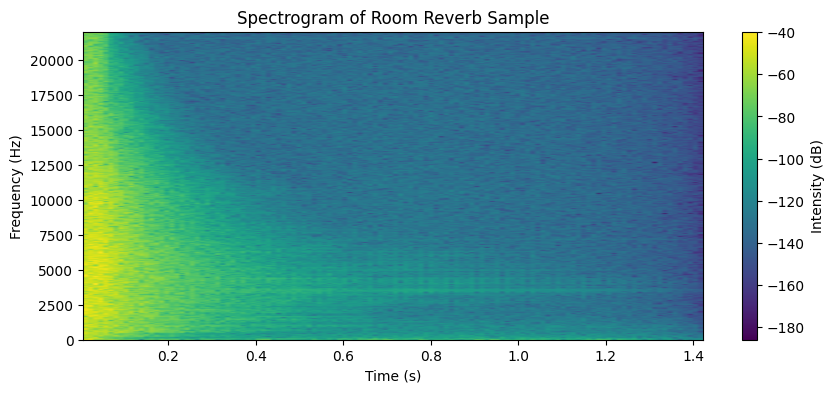

In [100]:

#loading the reverb sample
sample_rate_reverb, room_reverb_sample = load_wav_file("room_reverb_sample.wav")

play_signal(room_reverb_sample)
plot_waveform(room_reverb_sample, "Room Reverb Sample", "Room Reverb Sample")
plot_spectrogram(room_reverb_sample, "Spectrogram of Room Reverb Sample")


In [64]:
# loading a drum loop sample
sample_rate_drum, drum_loop_sample = load_wav_file("drum_break_137.wav")

In [101]:
play_signal(drum_loop_sample, sample_rate=sample_rate_drum)

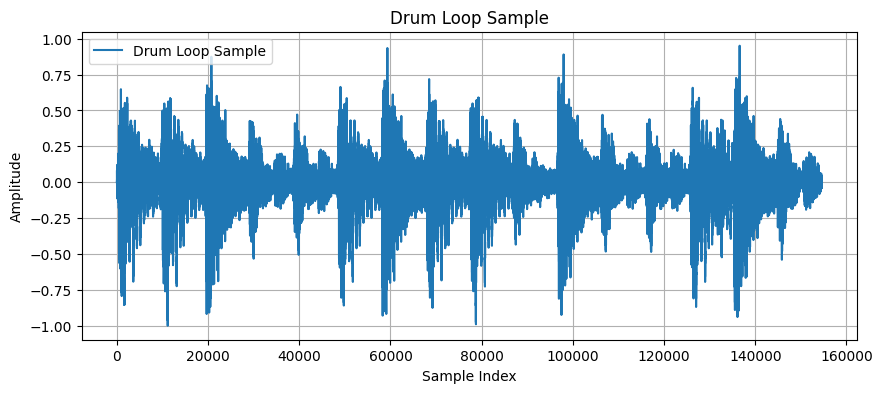

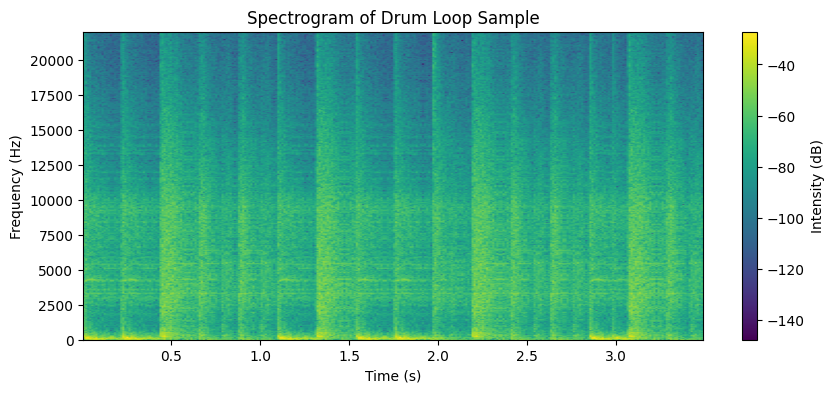

In [58]:
plot_waveform(drum_loop_sample, "Drum Loop Sample", "Drum Loop Sample") #we have L and R signals
plot_spectrogram(drum_loop_sample, "Spectrogram of Drum Loop Sample")

In [51]:
drum_reverb = np.convolve(drum_loop_sample, room_reverb_sample)

##### Playing the original and the convolved signals
We can see the reverb!

In [66]:
play_signal(drum_loop_sample, sample_rate=sample_rate_drum) #play the original signal

In [102]:
play_signal(drum_reverb * 0.05, sample_rate=sample_rate_drum) #play the convolved signal with very lower amplitude otherwise the signal clips

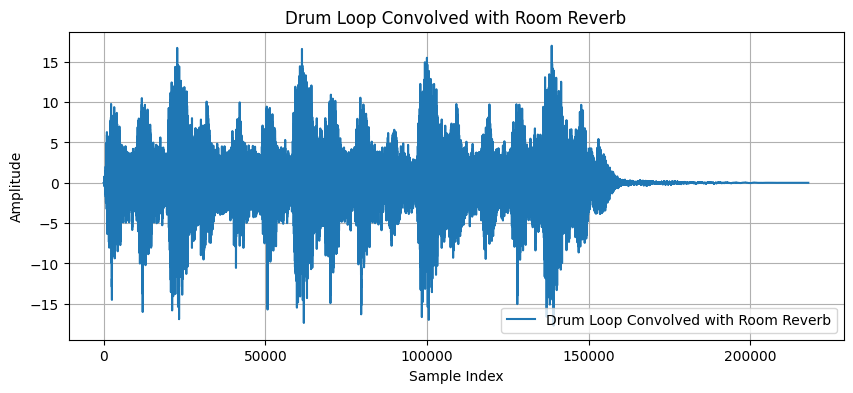

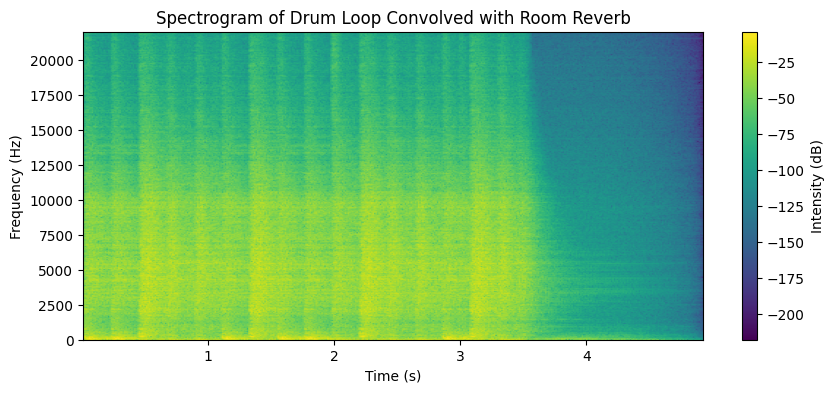

In [ ]:
plot_waveform(drum_reverb, "Drum Loop Convolved with Room Reverb", "Drum Loop Convolved with Room Reverb")
plot_spectrogram(drum_reverb, "Spectrogram of Drum Loop Convolved with Room Reverb")

#### Other reverb sounds
Lets try reverberating the drum through an open hihat and a very low kick

In [69]:
sample_rate_hh, openhh_sample = load_wav_file("open_hihat.wav")
sample_rate_kick, kick_sample = load_wav_file("low_kick.wav")

C:\Users\mathe\AppData\Local\Temp\ipykernel_7400\3892187661.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(file_path)


In [104]:
play_signal(openhh_sample, sample_rate=sample_rate_hh)
play_signal(kick_sample, sample_rate=sample_rate_kick) 

In [71]:
drum_loop_hh_reverb = np.convolve(drum_loop_sample, openhh_sample) #convolve the drum loop with the open hi-hat

In [103]:
play_signal(drum_loop_hh_reverb * 0.03, sample_rate=sample_rate_drum) 

very nice highs!

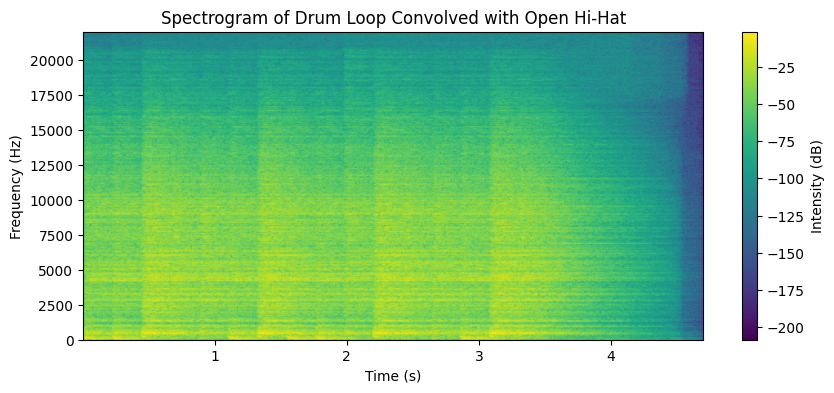

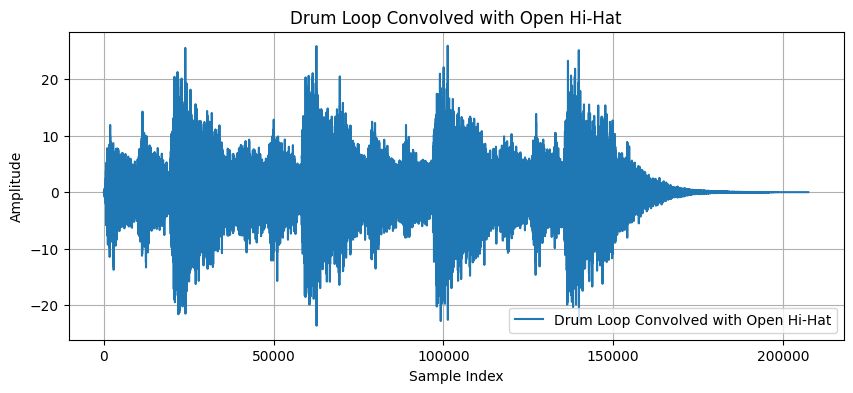

In [92]:
plot_spectrogram(drum_loop_hh_reverb, "Spectrogram of Drum Loop Convolved with Open Hi-Hat")
plot_waveform(drum_loop_hh_reverb, "Drum Loop Convolved with Open Hi-Hat", "Drum Loop Convolved with Open Hi-Hat")

In [94]:
drum_loop_kick_reverb = np.convolve(drum_loop_sample, kick_sample) #convolve the drum loop with the kick
drum_loop_kick_reverb = drum_loop_kick_reverb / np.max(np.abs(drum_loop_kick_reverb)) #normalize the audio


In [105]:
play_signal(drum_loop_kick_reverb, sample_rate=sample_rate_drum)

wow, thats deep! All the high frequencies are cut!

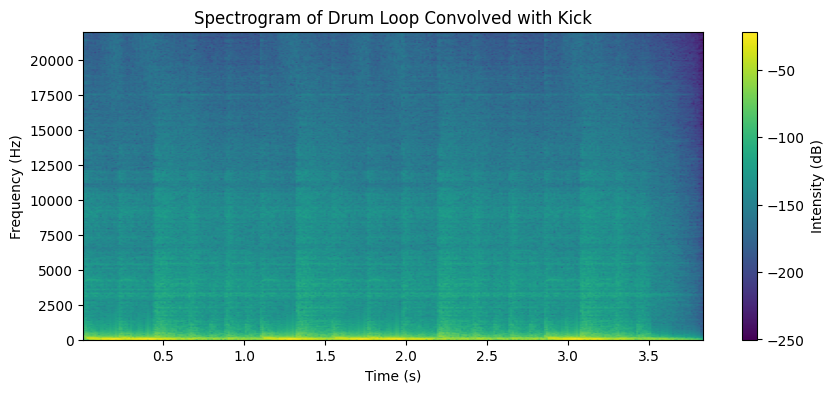

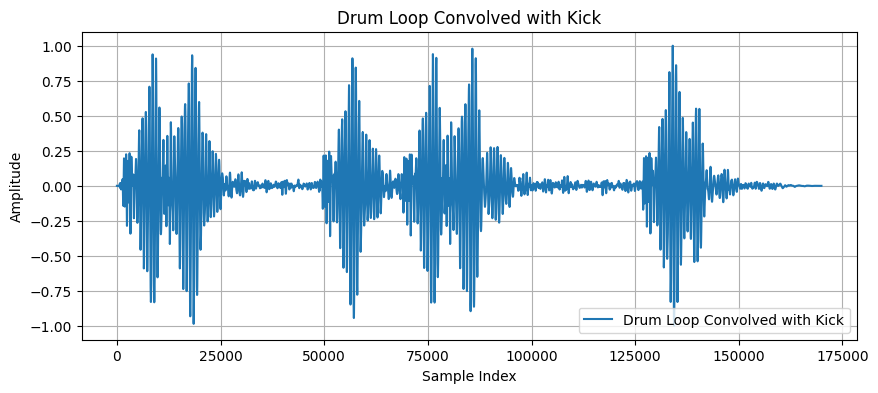

In [96]:
plot_spectrogram(drum_loop_kick_reverb, "Spectrogram of Drum Loop Convolved with Kick")
plot_waveform(drum_loop_kick_reverb, "Drum Loop Convolved with Kick", "Drum Loop Convolved with Kick")

wow, thats deep!

In [107]:
from scipy.io.wavfile import write

# Save all audio files with their respective variable names, applying the respective amplitude factors
write("s_A.wav", sample_rate, (s_A * 0.2).astype(np.float32))
write("s_C.wav", sample_rate, (s_C * 0.2).astype(np.float32))
write("A_conv_C.wav", sample_rate, (A_conv_C * 0.02).astype(np.float32))
write("drum_reverb.wav", sample_rate_drum, (drum_reverb * 0.05).astype(np.float32))
write("drum_loop_hh_reverb.wav", sample_rate_drum, (drum_loop_hh_reverb * 0.03).astype(np.float32))
write("drum_loop_kick_reverb.wav", sample_rate_drum, drum_loop_kick_reverb.astype(np.float32))


**Author:** Matheus Sinto Novaes <br>
**E-mail:** matheus.sinto@unesp.br

**Course:** Digital Speech Processing <br>
**Professor:** Dr. Eng. Rodrigo Capobianco Guido <br>
**Date:** March 17 2025
